# Breast Cancer Classification

## Importing packages

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

## Loading and inspecting data

In [105]:
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [108]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [109]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [110]:
# Dropping unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

## Exploratory Data Analysis (EDA)

### Target variable

In [111]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [112]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

### Feature correlation analysis

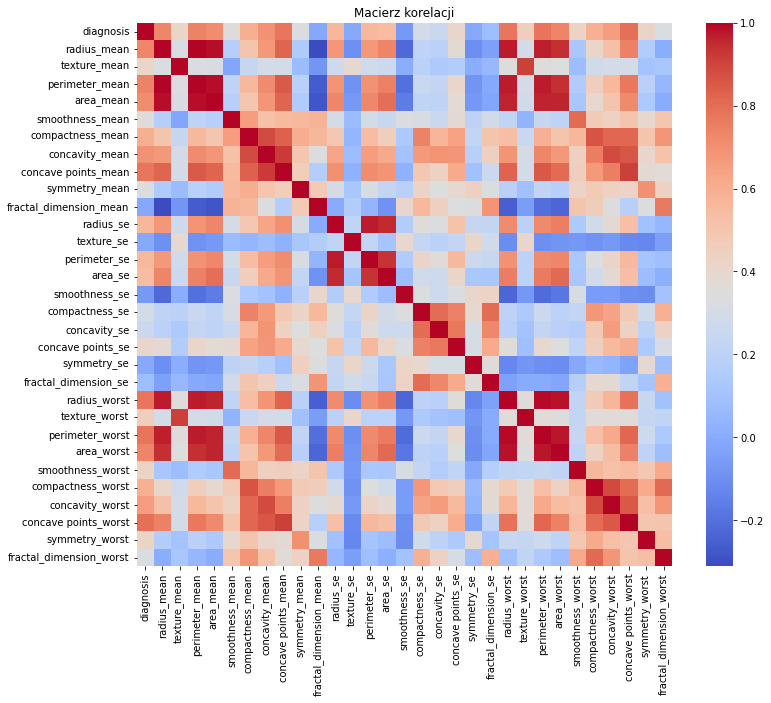

In [113]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Macierz korelacji")
plt.show()

In [114]:
# Checking feature correlations with the target variable
correlation = df.corr()['diagnosis'].abs().sort_values(ascending=False)
correlation

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [115]:
# Dropping low-correlation features (<0.1)
df = df.drop(['symmetry_se', 'texture_se', 'fractal_dimension_mean', 'smoothness_se', 'fractal_dimension_se'], axis=1)

In [116]:
correlation = df.corr()['diagnosis'].abs().sort_values(ascending=False)
correlation

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
Name: diagnosis, dtype: float64

## Initial preprocessing

In [117]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [118]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Size: {X_train.shape[0]}, Test Size: {X_test.shape[0]}")

Training Size: 455, Test Size: 114


In [119]:
# Standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Model training and evaluation

## Initial model - all features

In [120]:
# Training KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [121]:
# Model performance
train_score = knn.score(X_train_std, y_train)
test_score = knn.score(X_test_std, y_test)
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

Training Accuracy: 0.9736
Test Accuracy: 0.9649


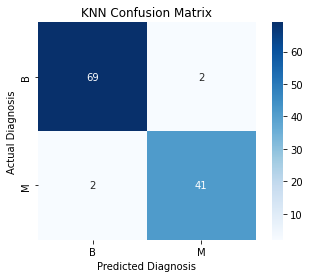

In [122]:
# Confusion Matrix
knn_confusion = confusion_matrix(y_test, knn.predict(X_test_std))
sns.heatmap(knn_confusion, cmap="Blues", annot=True, fmt="g", square=True,
            xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
plt.title('KNN Confusion Matrix')
plt.show()

In [123]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, knn.predict(X_test_std))
precision = precision_score(y_test, knn.predict(X_test_std))
recall = recall_score(y_test, knn.predict(X_test_std))
f1 = f1_score(y_test, knn.predict(X_test_std))

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9649
Precision: 0.9535
Recall: 0.9535
F1-score: 0.9535


<b><i>
The model demonstrates high accuracy, which is a strong indicator of its effectiveness in distinguishing between benign and malignant cases.
Additionally, the precision is excellent, meaning that when the model predicts cancer, it is almost always correct.
However, the recall is lower, indicating that some malignant cases are being missed.
This is a critical issue in medical diagnosis, as false negatives could lead to undiagnosed cancer, delaying treatment.
Such situation is unacceptable and model has to be tuned - beginning with correlated features.
</b></i>

## Dimensionality reduction - removing correlated features

In [124]:
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.679090,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,0.275869,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.691765,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.732562,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.301467,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.497473,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.631925,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.698050,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.303379,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
radius_se,0.679090,0.275869,0.691765,0.732562,0.301467,0.497473,0.631925,0.698050,0.303379,1.000000,...,0.715065,0.194799,0.719684,0.751548,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559


In [125]:
# Compute the correlation matrix
corr_matrix = X.corr().abs()

# Get the upper triangle of the correlation matrix (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify highly correlated variables (threshold > 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Iterative removal and evaluation
for col in to_drop:
    print(f"\nRemoving variable: {col}")
    
    # Create a new dataset without the selected variable
    X_reduced = X.drop(columns=[col])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

    # Standardization
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)

    # Evaluate the model
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")


Removing variable: perimeter_mean
Accuracy: 0.9649
Recall: 0.9535
F1-score: 0.9535

Removing variable: area_mean
Accuracy: 0.9649
Recall: 0.9535
F1-score: 0.9535

Removing variable: concave points_mean
Accuracy: 0.9649
Recall: 0.9535
F1-score: 0.9535

Removing variable: perimeter_se
Accuracy: 0.9649
Recall: 0.9535
F1-score: 0.9535

Removing variable: area_se
Accuracy: 0.9649
Recall: 0.9535
F1-score: 0.9535

Removing variable: radius_worst
Accuracy: 0.9649
Recall: 0.9535
F1-score: 0.9535

Removing variable: texture_worst
Accuracy: 0.9737
Recall: 0.9767
F1-score: 0.9655

Removing variable: perimeter_worst
Accuracy: 0.9649
Recall: 0.9535
F1-score: 0.9535

Removing variable: area_worst
Accuracy: 0.9649
Recall: 0.9535
F1-score: 0.9535

Removing variable: concave points_worst
Accuracy: 0.9649
Recall: 0.9535
F1-score: 0.9535


In [126]:
X.corr()# Drop redundant variables
X_final = X.drop(columns=[
    "perimeter_mean", "area_mean", "concave points_mean", "perimeter_se", 
    "area_se", "radius_worst", "perimeter_worst", "area_worst", "concave points_worst",
    "texture_worst"  # Removing because it improved recall
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train final KNN model
knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_train_std, y_train)
y_pred_final = knn_final.predict(X_test_std)

# Evaluate final model
print(f"Final Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Final Recall: {recall_score(y_test, y_pred_final):.4f}")
print(f"Final F1-score: {f1_score(y_test, y_pred_final):.4f}")

Final Accuracy: 0.9649
Final Recall: 0.9535
Final F1-score: 0.9535


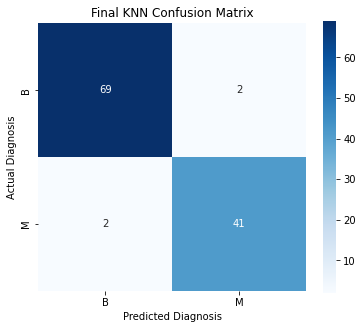

In [127]:
final_confusion = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6,5))
sns.heatmap(final_confusion, cmap="Blues", annot=True, fmt="g", square=True,
            xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
plt.title('Final KNN Confusion Matrix')
plt.show()

## Dimensionality reduction - PCA


Results with PCA:
Accuracy: 0.9649
Recall: 0.9535
F1-score: 0.9535


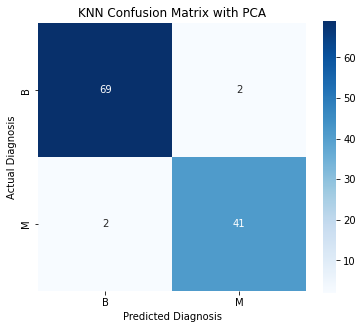

In [128]:
# Apply PCA - Find optimal number of components
pca = PCA(n_components=10)  # You can experiment with different values
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

# Evaluate PCA-based model
print("\nResults with PCA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_pca):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_pca):.4f}")

# Confusion matrix for PCA model
pca_confusion = confusion_matrix(y_test, y_pred_pca)

plt.figure(figsize=(6,5))
sns.heatmap(pca_confusion, cmap="Blues", annot=True, fmt="g", square=True,
            xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
plt.title('KNN Confusion Matrix with PCA')
plt.show()

<b><i>Neither dimensionality reduction nor PCA helped in achieving a higher recall.
Since PCA did not improve performance, this model will be discarded due to its reduced interpretability.
The model with removed correlated features will be selected for further tuning, as it maintained the same performance metrics while reducing the number of features from 25 to 15.
This makes the model simpler to interpret, less prone to overfitting, and faster to train.</b></i>


In [129]:
#.......................................

In [130]:
param_grid  = {'n_neighbors': np.arange(1, 50)}

knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
knn_cv.fit(X_train_std, y_train)

print("Optimal n_neighbors:", knn_cv.best_params_)

Optimal n_neighbors: {'n_neighbors': np.int64(1)}


<b><i>
Apparently, according to Grid Search Cross Validation, the best number of neighbors is 1.
It is necessary to check if k=1 gives better results than k=5
</b></i>

In [131]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train_std, y_train)
y_pred_1 = knn_1.predict(X_test_std)
print(f"Recall for n_neighbors=1: {recall_score(y_test, y_pred_1):.4f}")

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train_std, y_train)
y_pred_5 = knn_5.predict(X_test_std)
print(f"Recall for n_neighbors=5: {recall_score(y_test, y_pred_5):.4f}")

Recall for n_neighbors=1: 0.9070
Recall for n_neighbors=5: 0.9535


<b><i>
The recall of both models is equal. Model with k=1 will be rejected as potentially less stable.
</b></i>

In [132]:
# Checking different metrics
knn_manhattan = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_manhattan.fit(X_train_std, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_std)
print(f"Recall with Manhattan metric: {recall_score(y_test, y_pred_manhattan):.4f}")

Recall with Manhattan metric: 0.9302


In [133]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print(f"Weighted KNN Recall: {recall_score(y_test, y_pred):.4f}")

Weighted KNN Recall: 0.9535
